In [ ]:
# https://realpython.com/logistic-regression-python/

# Logistic Regression in Python: Handwriting Recognition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x, y = load_digits(return_X_y=True)

In [3]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [7]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [8]:
x_test = scaler.transform(x_test)

In [9]:
y_pred = model.predict(x_test)

In [10]:
model.score(x_train, y_train)

0.964509394572025

In [11]:
model.score(x_test, y_test)

0.9416666666666667

In [12]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

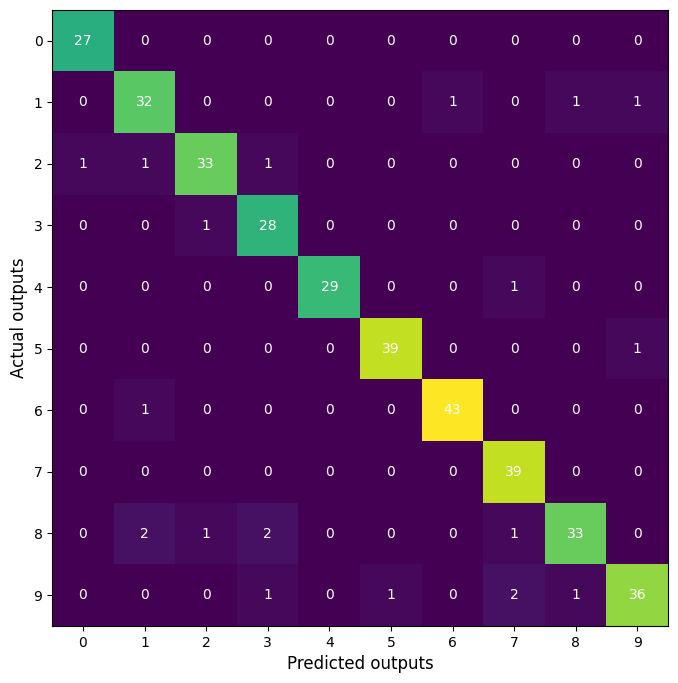

In [17]:
cm = confusion_matrix(y_test, y_pred)
font_size = 12

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

